In [7]:
import numpy as np
import matplotlib.pyplot as plt
import gwatpy.mcmc_routines as gmcmc
from corner import corner

In [ ]:
N = 100
time = np.linspace(0,N,N)
dn = 2/ (N-1)
sigma = 1
beta = 5

In [31]:
true_data = np.loadtxt("../data/full_data_transdimensional_5_5_1_100.csv")
true_clean_data = np.loadtxt("../data/clean_data_transdimensional_5_5_1_100.csv")

In [24]:
def cheb_fn(P,coeff,x ):
    return np.sum(coeff[:P] * np.cos(np.arange(P)*np.arccos(x)))

In [8]:
data = gmcmc.RJPTMCMC_unpack_file("../data/output_trans.hdf5")

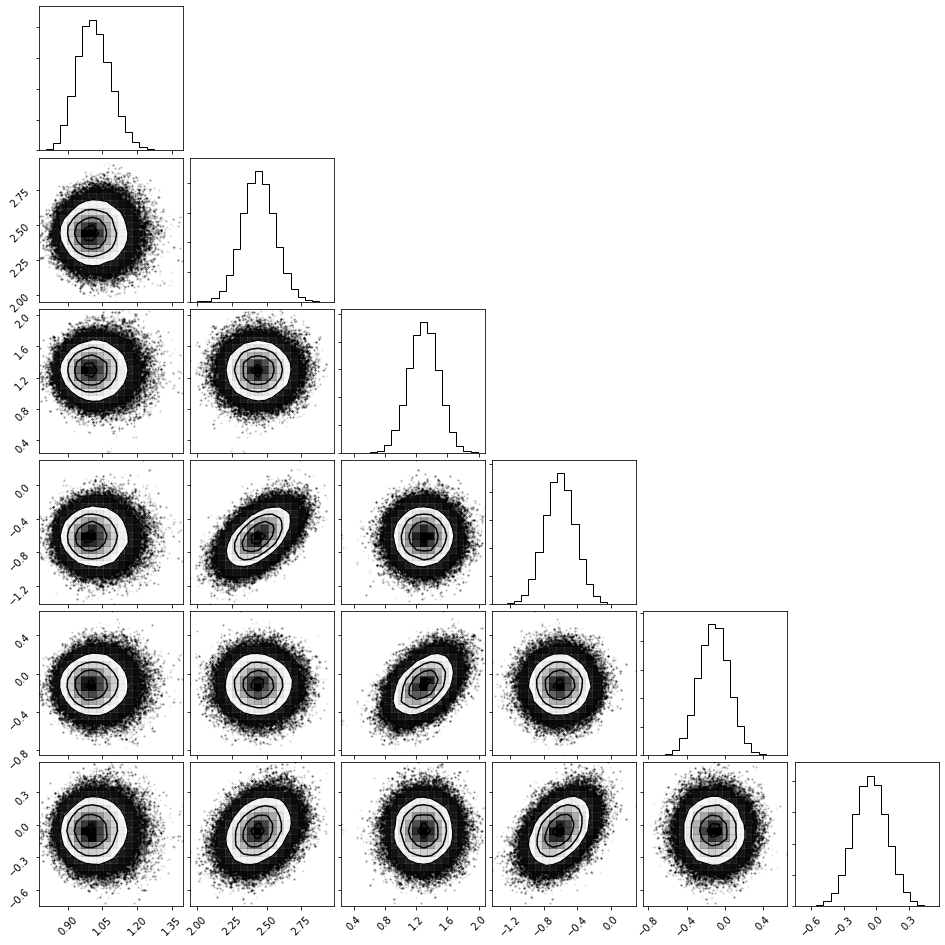

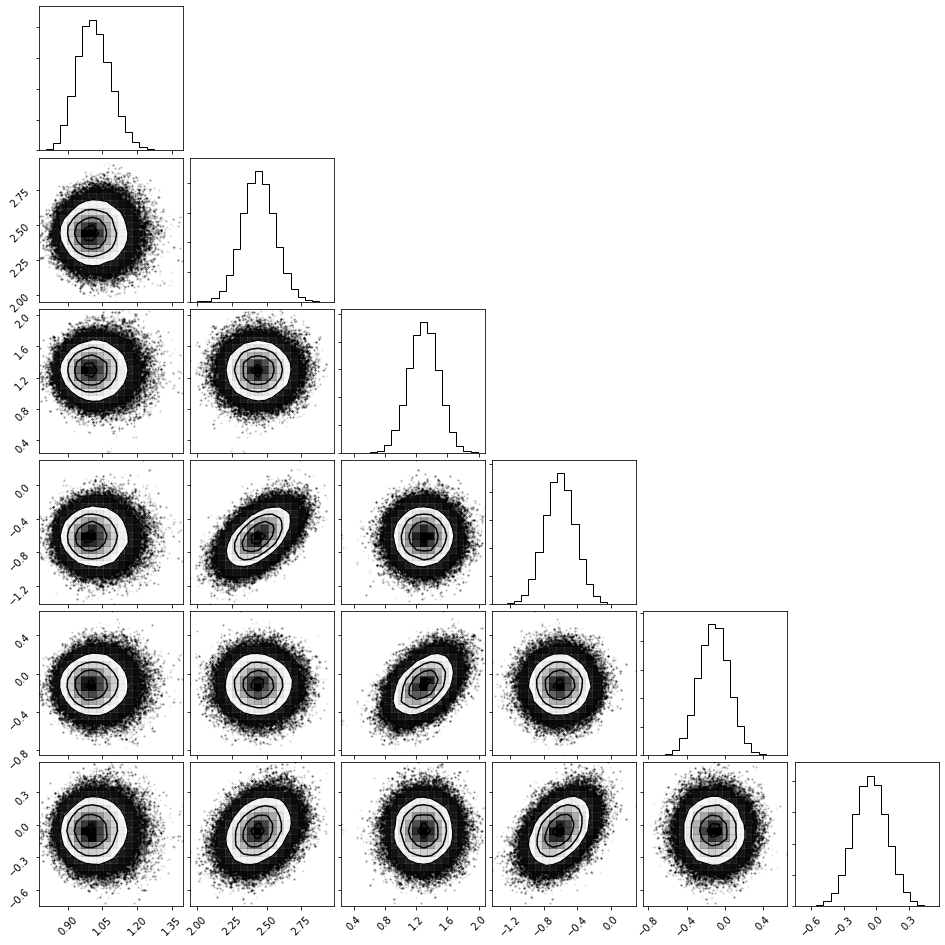

In [57]:
corner(data[0][:,:6])

In [49]:
recon = [[cheb_fn(5, data[0][x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(1000)]


In [53]:
up = np.quantile(recon,.9,axis=0)
down = np.quantile(recon,.1,axis=0)

print(up.shape)

(100,)


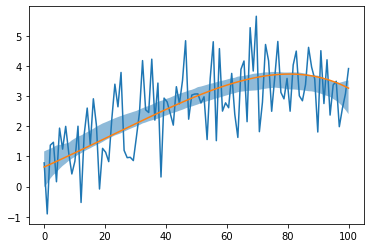

In [56]:
plt.plot(time,true_data)
plt.plot(time,true_clean_data)
plt.fill_between(time,up,down,alpha=.5)